In [514]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
from scipy import optimize
from sklearn import linear_model
from sklearn.metrics import r2_score
import requests

In [515]:
url = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
resp = requests.get(url)
if resp.status_code==200:
    with open('full_data.csv','wb') as fp:
        fp.write(resp.content)
    


In [516]:
data_covid = pd.read_csv('full_data.csv',parse_dates=True)

In [517]:
latest_day = data_covid.date.values[-1]
print(f'Moste recent day: {latest_day}')

Moste recent day: 2020-03-28


In [518]:
population = pd.read_csv('countries.csv')
n = len(population)
for i in range(n):
    country = population.loc[i,'Country']
    if country.endswith(' '):
        population.loc[i,'Country'] = country[:-1]
population.loc[n,'Country'] = 'World'
population.loc[n,'Population'] = population.Population.sum()
population.loc[n,'Area (sq. mi.)'] = population['Area (sq. mi.)'].sum()

population['Pop. Density (per sq. mi.)']= population['Population']/population['Area (sq. mi.)']

population.tail().T

,223,224,225,226,227
Country,Western Sahara,Yemen,Zambia,Zimbabwe,World
Region,NORTHERN AFRICA,NEAR EAST,SUB-SAHARAN AFRICA,SUB-SAHARAN AFRICA,NaN
Population,273008,2.14562e+07,1.1502e+07,1.22368e+07,6.52404e+09
Area (sq. mi.),266000,527970,752614,390580,1.35798e+08
Pop. Density (per sq. mi.),1.02635,40.639,15.2827,31.3298,48.0424
Coastline (coast/area ratio),0.42,0.36,0,0,NaN
Net migration,0,0,0,0,NaN
Infant mortality (per 1000 births),0,61.5,88.29,67.69,NaN
GDP ($ per capita),0,800,800,1900,NaN
Literacy (%),0,50.2,80.6,90.7,NaN


In [519]:
data=data_covid.merge(population,how = 'left',left_on='location',right_on='Country')
data.drop(columns=['Country'],inplace=True)

In [521]:
data['death_rate']=data['total_deaths']/data['total_cases']
data['death_rate']=data['death_rate'].fillna(0)

data['cases_per_million'] = data['total_cases']/data['Population']*1000000
data['death_per_million'] = data['total_deaths']/data['Population']*1000000


In [522]:
styles = [s for s in plt.style.library.keys()]
style = styles[2]
plt.style.use(style)
print(style)

dark_background


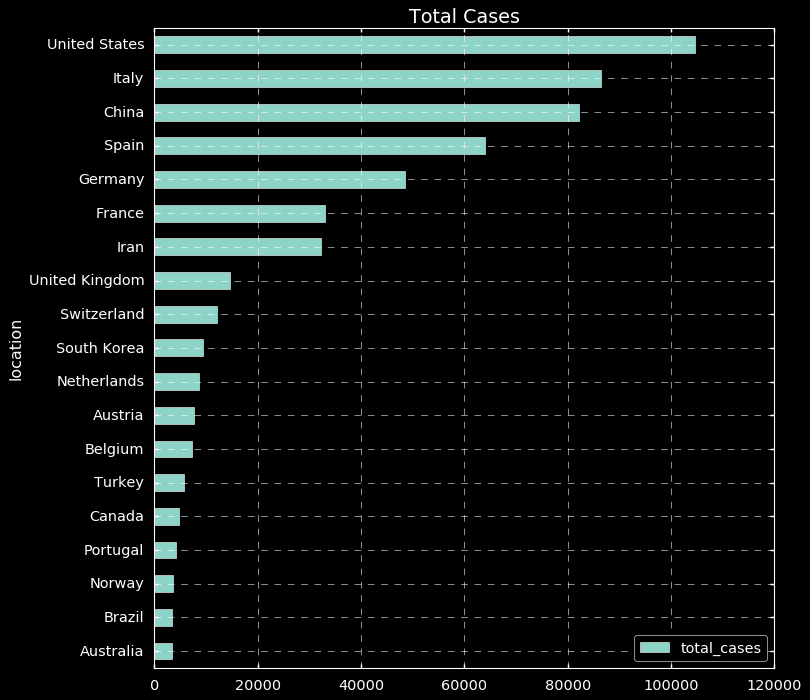

In [523]:
data[data.date == latest_day].sort_values(by = 'total_cases')[-20:-1].plot('location','total_cases',
                                                                           kind = 'barh',
                                                                          figsize = (10,10),
                                                                          grid = True,
                                                                          title = 'Total Cases');


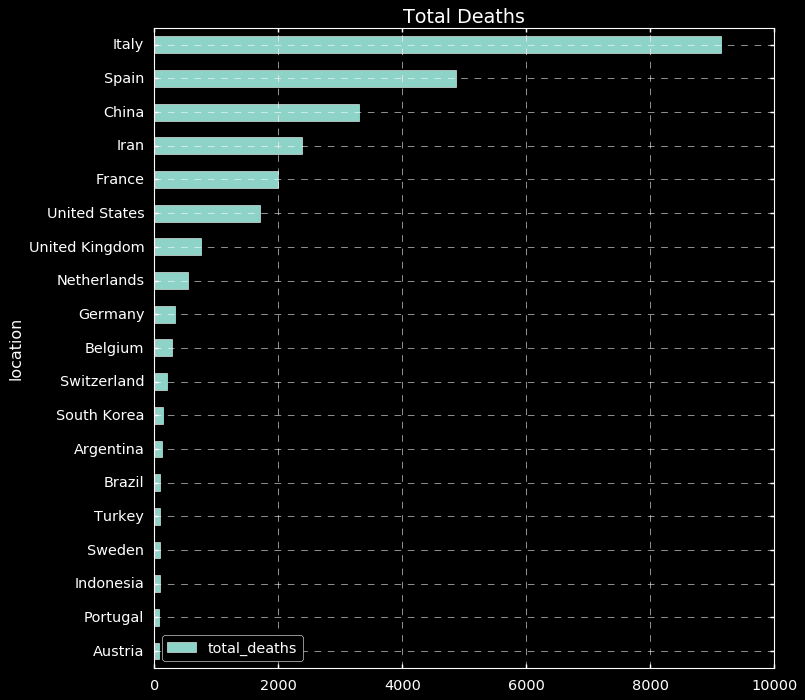

In [525]:
data[data.date == latest_day].sort_values(by = 'total_deaths')[-20:-1].plot('location','total_deaths',
                                                                           kind = 'barh',
                                                                          figsize = (10,10),
                                                                          grid = True,
                                                                          title = 'Total Deaths');


C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


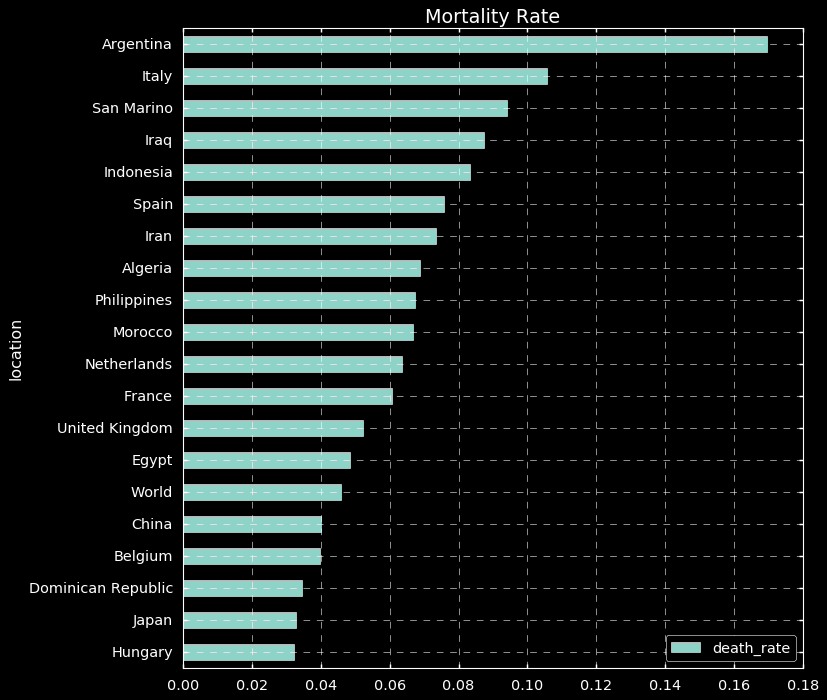

In [526]:
data[data.date == latest_day][data.total_deaths>10].sort_values(by = 'death_rate')[-20:].plot('location','death_rate',
                                                                           kind = 'barh',
                                                                          figsize = (10,10),
                                                                          grid = True,
                                                                          title = 'Mortality Rate');


C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


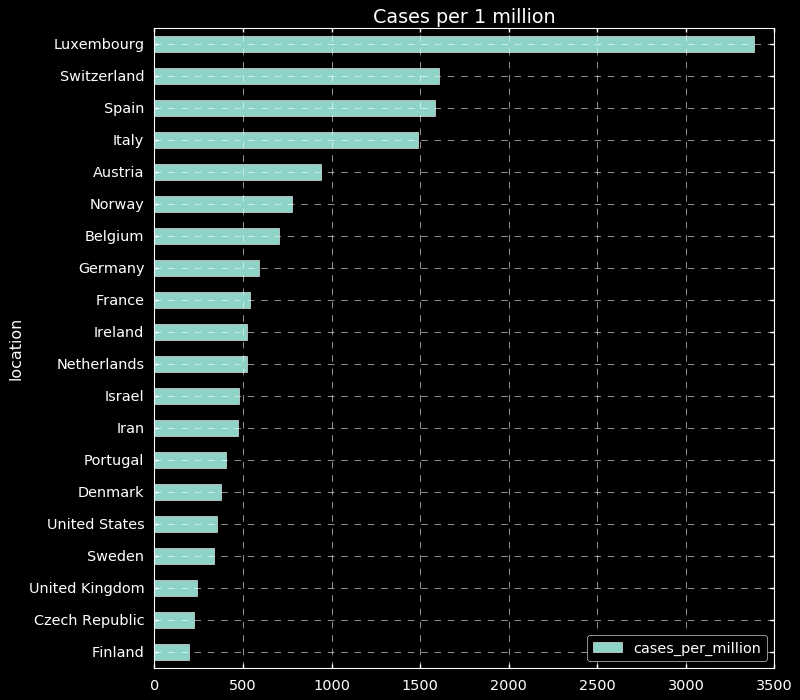

In [527]:
data[data.date == latest_day][data.total_cases>1000].sort_values(by = 'cases_per_million')[-20:].plot('location','cases_per_million',
                                                                                                       kind = 'barh',
                                                                                                      figsize = (10,10),
                                                                                                      grid = True,
                                                                                                      title = 'Cases per 1 million');

C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


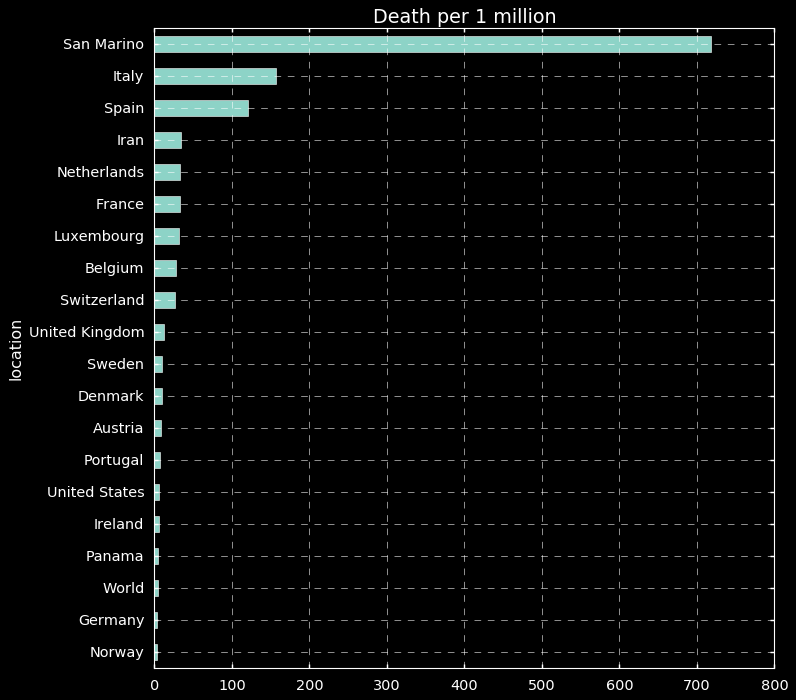

In [537]:
data[data.date == latest_day][data.total_deaths>10].sort_values(by = 'death_per_million')[-20:].plot('location','death_per_million',
                                                                                                     kind = 'barh',
                                                                                                     legend = False,
                                                                                                      figsize = (10,10),
                                                                                                      grid = True,
                                                                                                      title = 'Death per 1 million');
# data.plot()

In [538]:
data_recent = data[data.date == latest_day].copy()

In [539]:
data_recent.columns

Index(['date', 'location', 'new_cases', 'new_deaths', 'total_cases',
       'total_deaths', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'death_rate', 'cases_per_million',
       'death_per_million'],
      dtype='object')

In [540]:
dates = pd.date_range(data.date.values[0],data.date.values[-1])

In [542]:
period = 7

day_start = dates[(-1-period)]
day_start = f'{day_start.year:04.0f}-{day_start.month:02.0f}-{day_start.day:02.0f}'
day_end = latest_day

for ind,country in enumerate(data_recent.location):
    try:
        count_start = data[data.location == country][data.date == day_start].total_cases.values[0]
        count_end = data[data.location == country][data.date == day_end].total_cases.values[0]
        ratio = count_end/count_start
        sgr = np.log(ratio)/period
        
        death_start = data[data.location == country][data.date == day_start].total_deaths.values[0]
        death_end = data[data.location == country][data.date == day_end].total_deaths.values[0]
        ratio = death_end/death_start
        sgr_d = np.log(ratio)/period
    except:
        sgr = np.nan
        sgr_d = np.nan
    data_recent.loc[data_recent.index[ind],'cases_growth'] = sgr
    data_recent.loc[data_recent.index[ind],'deaths_growth'] = sgr_d

C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in longlong_scalars
  app.launch_new_instance()
C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in longlong_scalars
  a

In [543]:
data_recent['cases_doubling'] = np.log(2)/ data_recent['cases_growth'] 
data_recent['deaths_doubling'] = np.log(2)/ data_recent['deaths_growth'] 

In [544]:
data_recent.columns

Index(['date', 'location', 'new_cases', 'new_deaths', 'total_cases',
       'total_deaths', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'death_rate', 'cases_per_million',
       'death_per_million', 'cases_growth', 'deaths_growth', 'cases_doubling',
       'deaths_doubling'],
      dtype='object')

(0, 10)

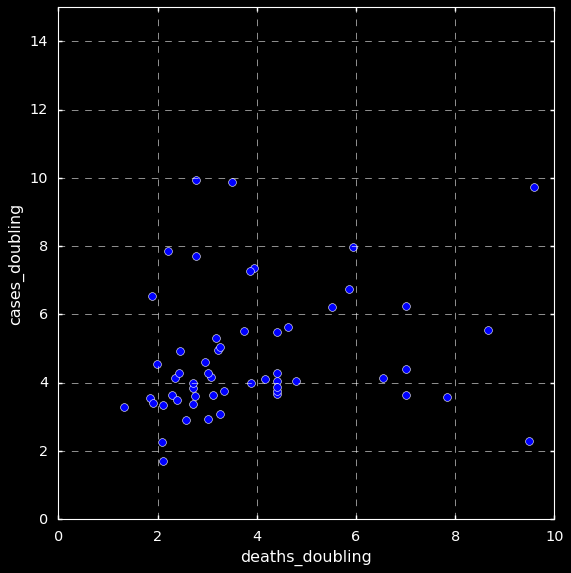

In [569]:
data_recent[data_recent.deaths_doubling>0].plot('deaths_doubling','cases_doubling',
                                              kind='scatter',figsize=(8,8),s = 49)
plt.ylim([0,15])
plt.xlim([0,10])
# plt.scatter(data_recent.cases_growth,
#            data_recent['Pop. Density (per sq. mi.)'].fillna(0))

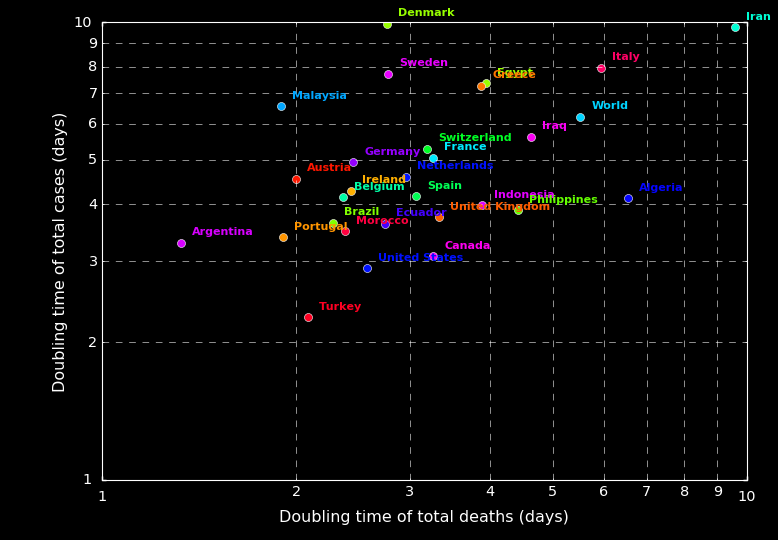

In [622]:
cond_col = 'total_deaths'
y_col = 'cases_doubling'
x_col = 'deaths_doubling'
threshold = 20
n_color = data_recent.index[-1]
cmap = plt.cm.get_cmap('hsv', n_color)
for i in data_recent.index:
    condition = data_recent.loc[i,cond_col]
    x = data_recent.loc[i,x_col]
    y = data_recent.loc[i,y_col]
    if condition>threshold and y>0 and x>0:
        
        country = data_recent.loc[i,'location']
        color = cmap(np.random.randint(n_color))
        plt.scatter([x],[y],s=52,c=color)
#         plt.grid('on')
        plt.annotate(s=country,
                     xy = (x,y), 
                     fontsize = 10,
                     weight='bold',
                     xytext=(10,10),
                     color = color,
                     textcoords='offset points', 
                     va='center')
# plt.xlim([0,2])
# plt.ylim([0,2])
plt.xlabel('Doubling time of total deaths (days)')
plt.ylabel('Doubling time of total cases (days)')
ax = plt.gca()
ax.loglog(True)
ax.set_xbound(1,10);
ax.set_ybound(1,10);
ax.set_xticklabels([0.1, 1,10],minor=False);
ax.set_xticklabels([i for i in range(2,10)]*2,minor=True);
ax.set_yticklabels([0.1, 1,10],minor=False);
ax.set_yticklabels([i for i in range(2,10)]*2,minor=True);
ax.grid('on','minor')

In [578]:
cmap(0)

(1.0, 0.0, 0.0, 1.0)

In [436]:
data_recent[data_recent.location=='China'].T

,1429
date,2020-03-28
location,China
new_cases,134
new_deaths,3
total_cases,82213
total_deaths,3301
Region,ASIA (EX. NEAR EAST)
Population,1.31397e+09
Area (sq. mi.),9.59696e+06
Pop. Density (per sq. mi.),136.916


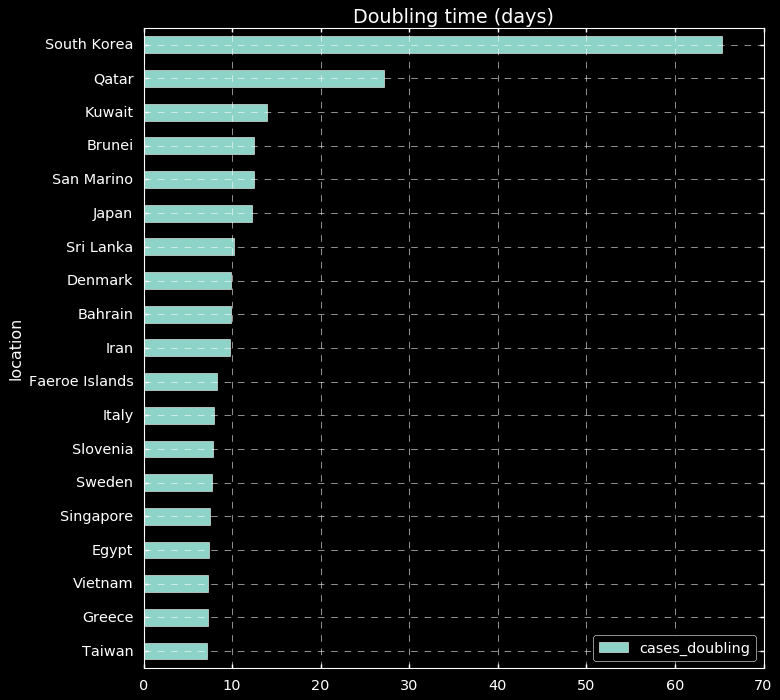

In [623]:
data_recent[data_recent.total_cases>100].sort_values(by = 'cases_doubling')[-20:-1].plot('location','cases_doubling',
                                                                           kind = 'barh',
                                                                          figsize = (10,10),
                                                                          grid = True,
                                                                          title = 'Doubling time (days)');

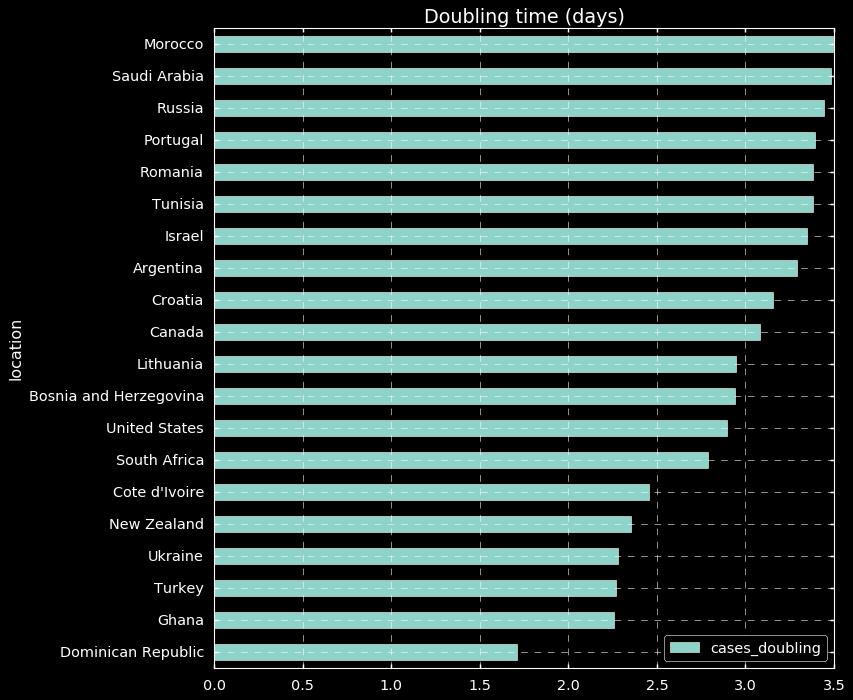

In [624]:
data_recent[data_recent.total_cases>100].sort_values(by = 'cases_doubling')[:20].plot('location','cases_doubling',
                                                                           kind = 'barh',
                                                                          figsize = (10,10),
                                                                          grid = True,
                                                                          title = 'Doubling time (days)');

In [263]:
data_recent[data_recent.location=='Australia'].T

,402
date,2020-03-27
location,Australia
new_cases,743
new_deaths,5
total_cases,3166
total_deaths,13
Region,OCEANIA
Population,2.02641e+07
Area (sq. mi.),7.68685e+06
Pop. Density (per sq. mi.),"2,6"


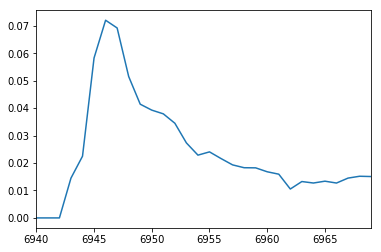

In [222]:
data[data.location=='United States'].death_rate[-30:].plot(logy=False)

In [73]:
countries = [c for c in data.location.unique() if c!='World']

In [255]:
growth100 = {}
n_start = 100
for country in countries:
    cases = data[data.location == country].total_cases.values
    idx = np.argmin(np.abs(cases-n_start))
    cases_from100 = cases[idx:]
    growth100.update({country:cases_from100})

(0, 40)

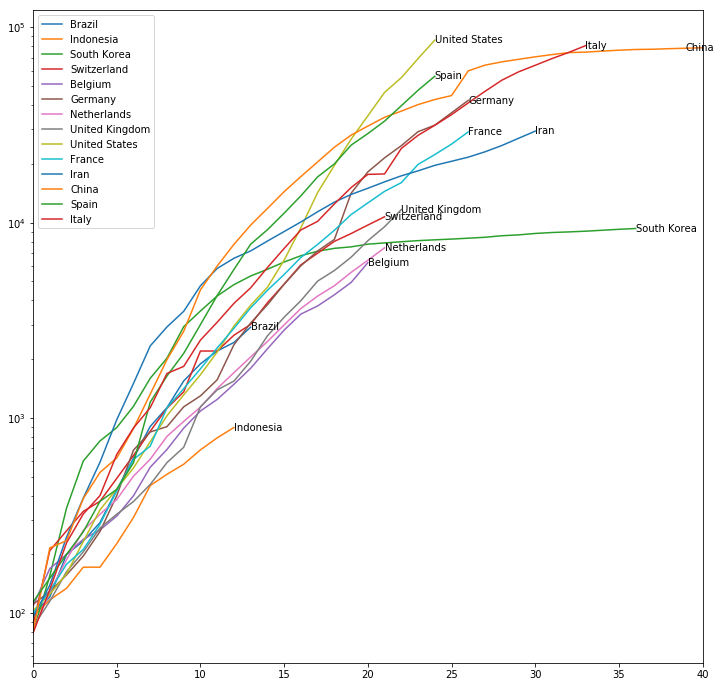

In [320]:
xmax = 40

top_countries_cases = data[data.date == latest_day].sort_values(by = 'total_cases')[-15:-1].location
top_countries_deaths = data[data.date == latest_day].sort_values(by = 'total_deaths')[-15:-1].location
countries_list = top_countries_deaths
plt.figure(figsize=(12,12))
for country in countries_list:
    y = growth100[country]
    if len(y)>xmax:
        xloc = xmax
    else:
        xloc = len(y)
    plt.semilogy(y)
    plt.annotate(s=country,xy = (xloc-1,y[xloc-1]), xytext=(0,0),textcoords='offset points', va='center')
#     plt.annotate(xy=(x[-1],y[-1]), xytext=(5,0), textcoords='offset points', text=l, va='center')
plt.legend(countries_list)
plt.xlim((0,xmax))

In [257]:
death20 = {}
n_start = 20
for country in countries:
    deaths = data[data.location == country].total_deaths.values
    idx = np.argmin(np.abs(deaths-n_start))
    deaths_from20 = deaths[idx:]
    death20.update({country:deaths_from20})

(0, 30)

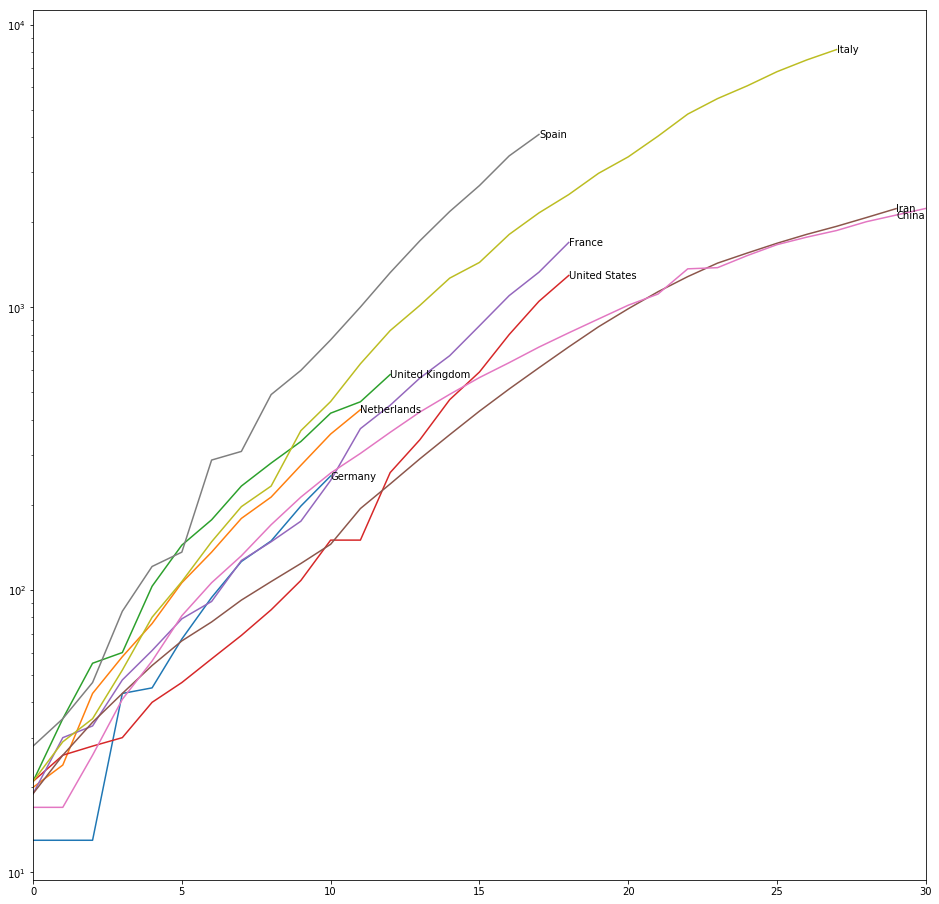

In [258]:
xmax = 30

top_countries_cases = data[data.date == latest_day].sort_values(by = 'total_cases')[-10:-1].location
top_countries_deaths = data[data.date == latest_day].sort_values(by = 'total_deaths')[-10:-1].location


countries_list = top_countries_deaths
plt.figure(figsize=(16,16))
for country in countries_list:
    y = death20[country]
    if len(y)>xmax:
        xloc = xmax
    else:
        xloc = len(y)
    plt.semilogy(y)
    plt.annotate(s=country,xy = (xloc-1,y[xloc-1]), xytext=(0,0),textcoords='offset points', va='center')
#     plt.annotate(xy=(x[-1],y[-1]), xytext=(5,0), textcoords='offset points', text=l, va='center')
# plt.legend(countries_list)
plt.xlim((0,xmax))


# Exponential Growth

In [79]:
ndays = 7 


In [259]:
m = linear_model.LinearRegression()
ndays = 7
eps = 1e-4
for country in countries:
#     print(country,)
    cases = data[data.location==country]['total_cases'].values[-ndays:]
    deaths = data[data.location==country]['total_deaths'].values[-ndays:]
    x = np.arange(ndays)[:,None]
    if (not len(x)==len(cases)) or cases.min()==0 or cases[-1]<20:
        continue
#     print(x.shape,cases.shape)
    m.fit(x,np.log(cases))
    sr_cases = m.coef_[0]
    dt_cases = np.log(2)/(sr_cases+eps)
    score = m.score(x,np.log(cases))
    if deaths.min()==0:
        sr_deaths = np.nan
        dt_deaths = np.nan
    else:
        m.fit(x,np.log(deaths))
        sr_deaths = m.coef_[0]
        dt_deaths = np.log(2)/(sr_deaths+eps)
    print(f'{country[:20]:20}{sr_cases:12.4f}{sr_deaths:12.4f}{dt_cases:12.4f}{dt_deaths:12.4f}{score:12.4f}')
    

Afghanistan               0.2110         nan      3.2832         nan      0.9312
Albania                   0.1557      0.2159      4.4476      3.2093      0.9886
Algeria                   0.2291      0.1219      3.0247      5.6831      0.9216
Andorra                   0.1848         nan      3.7497         nan      0.9956
Argentina                 0.2117      0.2125      3.2727      3.2600      0.9875
Armenia                   0.1490         nan      4.6485         nan      0.9763
Australia                 0.2069      0.0806      3.3483      8.5857      0.9489
Austria                   0.1655      0.3508      4.1847      1.9753      0.9948
Azerbaijan                0.1598      0.1672      4.3337      4.1427      0.9860
Bahrain                   0.0788      0.2415      8.7839      2.8692      0.9818
Bangladesh                0.1590         nan      4.3560         nan      0.9494
Barbados                  0.1685         nan      4.1106         nan      0.6846
Belarus                   0.

Taiwan                    0.1071      0.0000      6.4631   6931.4718      0.9881
Thailand                  0.1703      0.3210      4.0666      2.1589      0.8969
Togo                      0.1421         nan      4.8734         nan      0.8697
Trinidad and Tobago       0.2310         nan      2.9995         nan      0.5196
Tunisia                   0.2153      0.2874      3.2174      2.4109      0.9676
Turkey                    0.2632      0.3146      2.6322      2.2023      0.9902
Ukraine                   0.2851      0.0753      2.4302      9.1954      0.9867
United Arab Emirates      0.1656         nan      4.1822         nan      0.9355
United Kingdom            0.1734      0.1904      3.9944      3.6392      0.9964
United States             0.2423      0.2716      2.8598      2.5510      0.9926
Uruguay                   0.1230         nan      5.6311         nan      0.9784
Uzbekistan                0.1536         nan      4.5091         nan      0.9622
Venezuela                 0.

In [129]:
def logistic_growth(x,P0,r,Pmax):
#     P0 = k[0]
#     r = k[1]
#     Pmax = k[2]
    return np.log(Pmax/(1+(Pmax-P0)/P0*sp.exp(-r*x)))
def exponential_growth(x,P0,r):
    return np.log(P0*sp.exp(r*x))


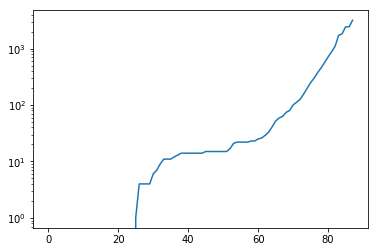

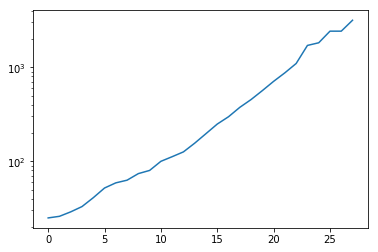

In [136]:

start = 60
end = 90
country = 'Australia'
plt.semilogy(data[data.location==country].total_cases.values)
plt.figure()
plt.semilogy(data[data.location==country].total_cases.values[start:end])


growth rate: 0.19
Max Cases: 69703798515
0.987977323778104


C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


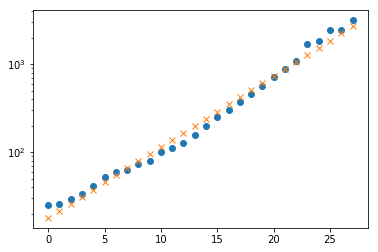

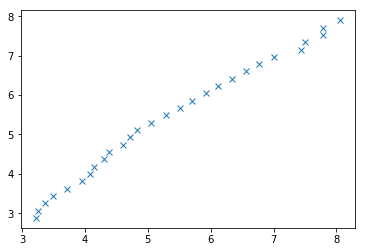

In [137]:
y = np.log(data[data.location==country].total_cases.values[start:end])
x = np.arange(len(y))
# result1=fit_curve(exponential_growth,x,y,[y[0],1])
# result2=fit_curve(logistic_growth,x,y,[y[0],1,y[-1]])
result2 = optimize.curve_fit(logistic_growth,x,y,[100,.25,1e5])
# print(result1)
print(f'growth rate: {result2[0][1]:.2f}')
print(f'Max Cases: {result2[0][2]:.0f}')
preds = logistic_growth(x,result2[0][0],result2[0][1],result2[0][2])
print(r2_score(y,preds))
plt.semilogy(x,np.exp(y),'o')
plt.semilogy(x,np.exp(preds),'x')
plt.figure()
plt.plot(y,preds,'x')

growth rate: 0.19
Init Cases: 18
0.9879773243582853


C:\Users\Pooya\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


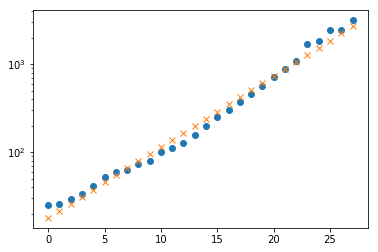

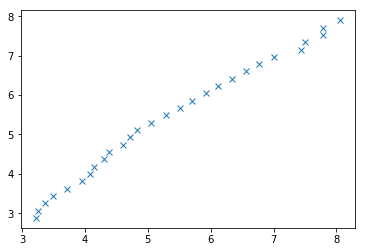

In [138]:
y = np.log(data[data.location==country].total_cases.values[start:end])
x = np.arange(len(y))
# result1=fit_curve(exponential_growth,x,y,[y[0],1])
# result2=fit_curve(logistic_growth,x,y,[y[0],1,y[-1]])
result2 = optimize.curve_fit(exponential_growth,x,y,[100,.25])
# print(result1)
print(f'growth rate: {result2[0][1]:.2f}')
print(f'Init Cases: {result2[0][0]:.0f}')
preds = exponential_growth(x,result2[0][0],result2[0][1])
print(r2_score(y,preds))
plt.semilogy(x,np.exp(y),'o')
plt.semilogy(x,np.exp(preds),'x')
plt.figure()
plt.plot(y,preds,'x')

In [82]:
def logistic_growth(x,k):
    P0 = k[0]
    r = k[1]
    Pmax = k[2]
    return Pmax/(1+(Pmax-P0)/P0*sp.exp(-r*x))

def logistic_growth(x,P0,r,Pmax):
#     P0 = k[0]
#     r = k[1]
#     Pmax = k[2]
    return Pmax/(1+(Pmax-P0)/P0*sp.exp(-r*x))
def exponential_growth(x,k):
    P0 = k[0]
    r = k[1]
    return P0*sp.exp(r*x)

def fit_curve(func,xdata,ydata,inital_params):

    def obj_func(params):
        yhat = func(xdata,params)
        return np.mean((ydata-yhat)**2)
    params = optimize.minimize(obj_func,inital_params)
    return params

In [140]:
x = np.array([1,2,3,4])
y = np.array([1,2,5,7])

In [142]:
result = fit_curve(exponential_growth,x,y,[1,1])

array([0.78943128, 0.55513388])